<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#구현" data-toc-modified-id="구현-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>구현</a></span><ul class="toc-item"><li><span><a href="#데이터" data-toc-modified-id="데이터-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>데이터</a></span></li><li><span><a href="#설정" data-toc-modified-id="설정-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>설정</a></span></li><li><span><a href="#할당" data-toc-modified-id="할당-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>할당</a></span><ul class="toc-item"><li><span><a href="#모든-데이터의-거리-계산-and-가까운-중심점-할당" data-toc-modified-id="모든-데이터의-거리-계산-and-가까운-중심점-할당-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>모든 데이터의 거리 계산 and 가까운 중심점 할당</a></span></li></ul></li><li><span><a href="#갱신" data-toc-modified-id="갱신-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>갱신</a></span><ul class="toc-item"><li><span><a href="#각-중심점의-평균으로-새로운-중심점-계산" data-toc-modified-id="각-중심점의-평균으로-새로운-중심점-계산-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>각 중심점의 평균으로 새로운 중심점 계산</a></span></li></ul></li><li><span><a href="#종료" data-toc-modified-id="종료-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>종료</a></span><ul class="toc-item"><li><span><a href="#그래프" data-toc-modified-id="그래프-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>그래프</a></span></li></ul></li></ul></li><li><span><a href="#함수로-만들기" data-toc-modified-id="함수로-만들기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>함수로 만들기</a></span><ul class="toc-item"><li><span><a href="#거리-계산-함수" data-toc-modified-id="거리-계산-함수-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>거리 계산 함수</a></span></li><li><span><a href="#클라스터링-함수" data-toc-modified-id="클라스터링-함수-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>클라스터링 함수</a></span></li><li><span><a href="#그래프" data-toc-modified-id="그래프-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>그래프</a></span></li></ul></li></ul></div>

# 기계학습(머신러닝)
통계기법이나 알고리즘을 통해 데이터에 숨겨진 패턴을 찾아 분류, 예측 하는 것

# 클러스터링 

## 구현

### 데이터

In [2]:
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)

### 설정
클러스터의 개수 정하기 (몇 개의 군집), 중심점 선택

In [3]:
k = 2
centroids = np.array([[2,5],[7,2]], dtype = float)

### 할당
각 데이터와 중심점의 거리 계산하여 클러스터에 할당
- norm : 두 점 사이의 거리

In [4]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [5]:
for j in range(k):
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]


가까운 거리 쪽으로 할당되어야 함

In [6]:
minDist = np.inf
for j in range(k):
    # distance from centroids[j] to x[0]
    distJ0 = normDist(centroids[j], x[0])
    print ("Distance {:.3f} between {} and {}".format(distJ0, centroids[j], x[0]))
    # pick the closest centroid
    if distJ0 < minDist:
        minDist = distJ0
        minIndex = j
print (".....Assigning {} to {}th centroid by {:.3f}".format(x[0], minIndex, minDist))

Distance 0.000 between [2. 5.] and [2. 5.]
Distance 5.831 between [7. 2.] and [2. 5.]
.....Assigning [2. 5.] to 0th centroid by 0.000


#### 모든 데이터의 거리 계산 and 가까운 중심점 할당
저장소 생성

In [7]:
clusterAssigned = np.zeros(shape = (x.shape[0],2), dtype = float)
print (clusterAssigned)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [8]:
x.shape

(9, 2)

In [9]:
row, c = x.shape
for i in range(row):
    minDist = np.inf   # arbitray max
    minIndex = -1      # arbitray index
    for j in range(k):
        # distance from centroids[j] to x[i]
        distJI = normDist(centroids[j], x[i])
        # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
        # pick the closest centroid
        if distJI < minDist:
            minDist = distJI
            minIndex = j
    print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
    clusterAssigned[i] = [minIndex, minDist]   #-----changed

.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000


[index, distance]

In [10]:
print (".....Assigned clusters: \n{}".format(clusterAssigned))

.....Assigned clusters: 
[[0.         0.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         3.60555128]
 [1.         0.        ]
 [1.         1.41421356]
 [1.         2.82842712]
 [1.         2.23606798]
 [1.         1.        ]]


### 갱신
중심점을 평균을 구해 다시 계산 

In [11]:
clusterAssigned[:,0]

array([0., 0., 0., 0., 1., 1., 1., 1., 1.])

첫번째 값의 0번째 index 데이터만 구해서 평균값 구하기

0번째 x값 출력하기

In [12]:
x[clusterAssigned[:,0]==0]

array([[2., 5.],
       [3., 6.],
       [2., 4.],
       [5., 7.]])

In [13]:
x[clusterAssigned[:,0]==1]

array([[7., 2.],
       [8., 3.],
       [9., 4.],
       [8., 4.],
       [7., 3.]])

#### 각 중심점의 평균으로 새로운 중심점 계산

In [14]:
_centroids=np.zeros(shape=(k,x.shape[1]), dtype=float)

`axis=0` : 세로축으로 평균구하기

In [20]:
for cent in range(k):
    _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)

In [21]:
print ("Centroids updated: \n", _centroids)

Centroids updated: 
 [[3.  5.5]
 [7.8 3.2]]


### 종료
소수점을 비교하여 갱신하기 어렵다고 느껴지면 종료
- `np.equal()` : 갱신이 되었는지 확인(True = 종료)

In [22]:
comparison = np.equal(centroids, _centroids)
print(comparison.all())

False


- `np.isclose()` : tolerence를 어느 정도 허용하면서 동인한지 비교

In [23]:
comparison = np.isclose(centroids, _centroids)
print(comparison.all())

False


#### 그래프

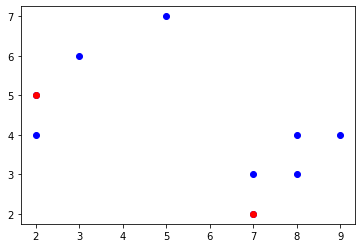

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(centroids[:,0],centroids[:,1],color='red')

## 함수로 만들기

### 거리 계산 함수

In [24]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

### 클라스터링 함수

In [25]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, k), dtype=float)
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

### 그래프

In [26]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')



====== Iteration 1 ======
.....Assigning [2. 5.] to 0th centroid by 0.000
.....Assigning [3. 6.] to 0th centroid by 1.414
.....Assigning [2. 4.] to 0th centroid by 1.000
.....Assigning [5. 7.] to 0th centroid by 3.606
.....Assigning [7. 2.] to 1th centroid by 0.000
.....Assigning [8. 3.] to 1th centroid by 1.414
.....Assigning [9. 4.] to 1th centroid by 2.828
.....Assigning [8. 4.] to 1th centroid by 2.236
.....Assigning [7. 3.] to 1th centroid by 1.000

.....Assigned clusters: 
 [[0.         0.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         3.60555128]
 [1.         0.        ]
 [1.         1.41421356]
 [1.         2.82842712]
 [1.         2.23606798]
 [1.         1.        ]]

.....Updating Centroids
 [[2. 5.]
 [7. 2.]] => 
[[3.  5.5]
 [7.8 3.2]]


====== Iteration 2 ======
.....Assigning [2. 5.] to 0th centroid by 1.118
.....Assigning [3. 6.] to 0th centroid by 0.500
.....Assigning [2. 4.] to 0th centroid by 1.803
.....Assigning [5. 7.] to 0th centroid by 2

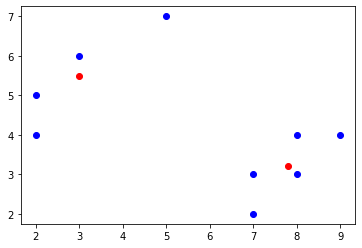

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[2,5],[3,6],[2,4],[5,7],[7,2],[8,3],[9,4],[8,4],[7,3]], dtype = float)
#x = np.array([[1, 2],[1, 4],[1, 0],[4, 2],[4, 4],[4, 0]])
k = 2
centroids = np.array([[2,5],[7,2]], dtype = float)
#centroids = np.array([[1,1],[4,1]], dtype = float)
centroids, clusterAssigned = cluster(x, k, centroids)
draw(x, centroids)